In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [304]:
df = pd.read_csv('dataset/iris-slp.csv', delimiter=';', names=['X1', 'X2', 'X3', 'X4', 'target'])
df.head()

,X1,X2,X3,X4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [305]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [306]:
x0_train = X[:40]
print(len(x0_train))
x0_val = X[40:50]
y0_train = y[:40]
y0_val = y[40:50]

x1_train = X[50:90]
x1_val = X[90:]
y1_train = y[50:90]
y1_val = y[90:]

train_data = np.concatenate((x0_train, x1_train))
val_data = np.concatenate((x0_val, x1_val))
train_labels = np.concatenate((y0_train, y1_train))
val_labels = np.concatenate((y0_val, y1_val))


# Encoding the labels
train_labels = np.where(train_labels == 'Iris-setosa', 0, 1)
val_labels = np.where(val_labels == 'Iris-setosa', 0, 1)

print('Train data:', train_data[0:2])
print('Train labels:', train_labels[0:5])

print('Val data:', val_data[0:2])
print('Val labels:', val_labels[0:5])


40
Train data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
Train labels: [0 0 0 0 0]
Val data: [[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]]
Val labels: [0 0 0 0 0]


In [307]:
def initialize_weights():
    weight = np.array([0.5, 0.5, 0.5, 0.5])
    bias = 0.5
    return weight, bias

In [308]:
def calculate_z(X, weight, bias):
    return np.dot(X, weight) + bias

In [309]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [310]:
def update_weights(weight, bias, X, y_true, y_pred, lr):
    common_derivative = 2 * (y_pred - y_true) * y_pred * (1 - y_pred)
    
    dw = X * common_derivative
    db = common_derivative
    
    weight = weight - lr * dw
    bias = bias - lr * db
    
    return weight, bias

In [311]:
def plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies):
   
    epoch_range = range(1, epochs + 1, 1)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_losses, marker='o', linestyle='-', label="Train Loss")
    plt.plot(epoch_range, val_losses, marker='s', linestyle='--', label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("SSE Loss")
    plt.title("Loss over Epochs")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_accuracies, marker='o', linestyle='-', label="Train Accuracy")
    plt.plot(epoch_range, val_accuracies, marker='s', linestyle='--', label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy over Epochs")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [312]:
def train(X_train, Y_train, X_val, Y_val, lr=0.1, epoch=5):
    w, b = initialize_weights()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    print("--- Training Started ---")
    for e in range(epoch):
        correct_preds = 0
        train_loss = 0
        for i in range(len(X_train)):
            z_i = calculate_z(X_train[i], w, b)
            y_pred_i = sigmoid(z_i)
            preds = (y_pred_i >= 0.5).astype(int)
            if preds == Y_train[i]:
                correct_preds += 1
            E = y_pred_i - Y_train[i]
            train_loss += E ** 2
            w, b = update_weights(w, b, X_train[i], Y_train[i], y_pred_i, lr)
        train_acc = correct_preds / len(X_train) * 100
        train_loss = train_loss / len(X_train)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
            
        val_preds = []
        val_loss = 0
        for i in range(len(X_val)):
            z_i = calculate_z(X_val[i], w, b)
            y_pred_i = sigmoid(z_i)
            pred = (y_pred_i >= 0.5).astype(int)
            val_preds.append(pred)

            E = y_pred_i - Y_val[i]
            val_loss += E**2
        val_loss = val_loss/len(X_val)
        val_acc = (np.array(val_preds) == Y_val).mean() * 100
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {e+1}/{epoch} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    print("--- Training Ended ---")
    
    # --- Panggil fungsi plotting di sini ---
    print("--- Plot Visualization ---")
    plot_metrics(epoch, train_losses, val_losses, train_accuracies, val_accuracies)
    


--- Training Started ---
Epoch 1/5 | Train Loss: 0.4499, Train Acc: 52.50% | Val Loss: 0.3290, Val Acc: 50.00%
Epoch 2/5 | Train Loss: 0.0375, Train Acc: 95.00% | Val Loss: 0.2473, Val Acc: 50.00%
Epoch 3/5 | Train Loss: 0.0244, Train Acc: 97.50% | Val Loss: 0.1759, Val Acc: 50.00%
Epoch 4/5 | Train Loss: 0.0174, Train Acc: 97.50% | Val Loss: 0.1194, Val Acc: 85.00%
Epoch 5/5 | Train Loss: 0.0127, Train Acc: 98.75% | Val Loss: 0.0816, Val Acc: 100.00%
--- Training Ended ---
--- Plot Visualization ---


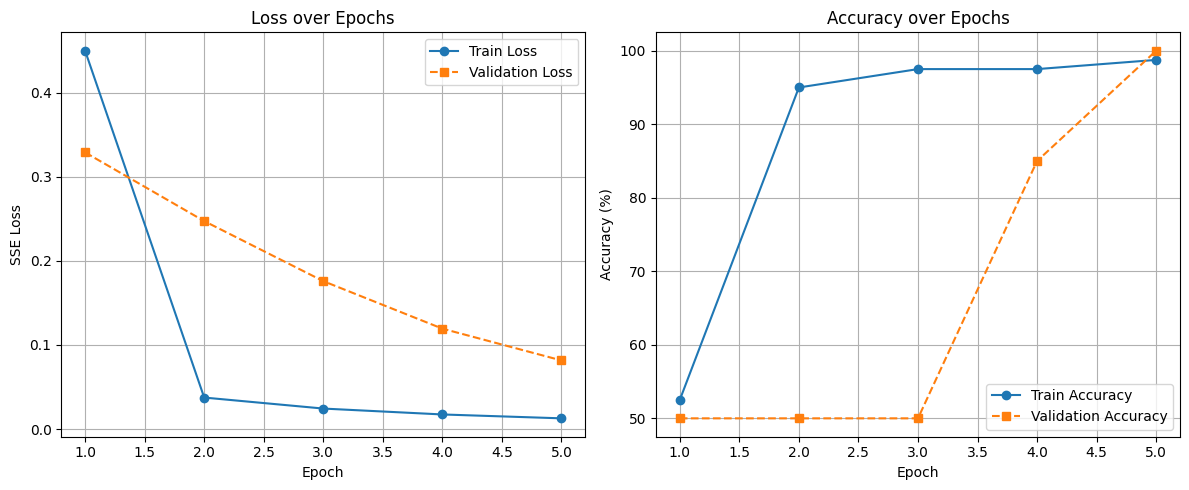

In [313]:
train(train_data, train_labels, val_data, val_labels, lr=0.1, epoch=5)